# Part I - Ford GoBike System Data Exploration
## by Diego Fernando Pinzón López

## Introduction

> This document explores a dataset which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# load in the dataset into a pandas dataframe, create a copy of the original dataframe named bike_tips
df = pd.read_csv('fordgobike-tripdata.csv')
bike_trips = df.copy()
bike_trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition
print(bike_trips.shape)
print(bike_trips.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Comprising a meticulously cleaned collection of 174,952 records, this dataset is structured across 16 distinct fields. The data unfolds in a coherent and meaningful manner:

**Temporal Data:**
- Duration in seconds of the trip (duration_sec, integer type)
- Start time of the trip (start_time, in date format)
- End time of the trip (end_time, in date format).

**Bike Stations:**
- Identification and names of both the starting stations (start_station_id and start_station_name) and the ending stations (end_station_id and end_station_name) of the trips.
- Geographical coordinates of latitude and longitude for the starting stations (start_station_latitude and start_station_longitude) and ending stations (end_station_latitude and end_station_longitude).
- Unique identification for each bicycle (bike_id).

**User Data:**

- User type: Indicates whether the user is a "Customer" or a "Subscriber".
- User's birth year (member_birth_year).
- User's gender (member_gender).

**Additional Information:**

- Indicator of whether the trip is covered by the "bike_share_for_all_trip" program, with options "NO" and "Yes".

This description offers a structured and fluent overview of the dataset's composition and significance, highlighting the relevance of each field and its utility in analyzing shared bicycle trips in the San Francisco Bay Area.

### What is/are the main feature(s) of interest in your dataset?

This exercise is purely descriptive in nature, with our main focus being to comprehend behavioral patterns of bike trips in San Francisco. Additionally, we aim to uncover whether there are distinct patterns in trips depending on the days of the week, hours of the day, and to ascertain if there is differentiated behavior between the two user types: customers and subscribers. Some questions can help to identify the patterns in trips like these:

- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Throughout this exercise, descriptive analyses will be conducted on the majority of variables within the dataset. However, our primary emphasis will be on three crucial variables: trip start, end times and duration (**start_time**, **end_time** and **duration_sec**, respectively). These variables hold paramount importance in identifying patterns in bike trip behaviors, as they allow us to derive relevant insights about the most frequently used days of the week, peak hours, and average travel durations for bike users.

It's noteworthy that we will be conducting segmented analyses based on user gender (**membem_gender**), user type (**user_type**), and birth year (**member_birth_year**). This approach will allow us to focus on identifying patterns of bike trip behavior and highlighting any significant trends or variations within these groups.

## Univariate Exploration

Le'ts wrangling the information 

In [5]:
# We convert the start_time, and the end_time variables from object to datetime format
bike_trips['start_time'] =  pd.to_datetime(bike_trips['start_time'])
bike_trips['end_time'] =  pd.to_datetime(bike_trips['end_time'])

# We delete the null info in the dataset. There is little information missing so it is prudent to delete
bike_trips = bike_trips.dropna()

In [6]:
# We create variables day_of_week and hour_of_day to have the day of the week and hour of start_time
bike_trips['day_of_week'] = bike_trips['start_time'].dt.day_name()
bike_trips['hour_of_day'] = bike_trips['start_time'].dt.hour

bike_trips['day_of_week'].replace({'Monday'   : '1.Monday'
                                  ,'Tuesday'  : '2.Tuesday'
                                  ,'Wednesday': '3.Wednesday'
                                  ,'Thursday' : '4.Thursday'
                                  ,'Friday'   : '5.Friday'
                                  ,'Saturday' : '6.Saturday'
                                  ,'Sunday'   : '7.Sunday'}
                                 ,inplace = True)

bike_trips['hour_of_day'] = bike_trips['hour_of_day'].replace({0: '00:00 - 00:59',   1: '01:00 - 01:59'
                                                              ,2: '02:00 - 02:59',   3: '03:00 - 03:59'
                                                              ,4: '04:00 - 04:59',   5: '05:00 - 05:59'
                                                              ,6: '06:00 - 06:59',   7: '07:00 - 07:59'
                                                              ,8: '08:00 - 08:59',   9: '09:00 - 09:59'
                                                              ,10: '10:00 - 10:59', 11: '11:00 - 11:59'
                                                              ,12: '12:00 - 12:59', 13: '13:00 - 13:59'
                                                              ,14: '14:00 - 14:59', 15: '15:00 - 15:59'
                                                              ,16: '16:00 - 16:59', 17: '17:00 - 17:59'
                                                              ,18: '18:00 - 18:59', 19: '19:00 - 19:59'
                                                              ,20: '20:00 - 20:59', 21: '21:00 - 21:59'
                                                              ,22: '22:00 - 22:59', 23: '23:00 - 23:59'})

In [7]:
# We reset_index
bike_trips.reset_index(drop = True, inplace = True)

Firstly, we initiate the process by generating a time series graph to comprehend the time range we are dealing with and to discern patterns based on the day of the month.

<ipython-input-8-4823b41b4a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['start_time'] = base['start_time'].dt.date


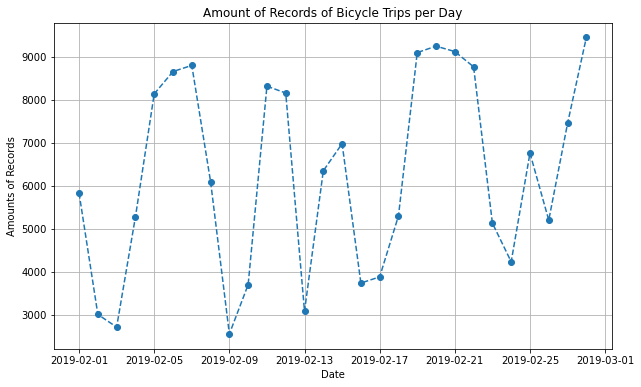

In [8]:
base = bike_trips[['start_time']]
base['start_time'] = base['start_time'].dt.date
daily_counts = base.groupby('start_time').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_counts
        ,marker = 'o'
        ,linestyle = '--')
plt.title('Amount of Records of Bicycle Trips per Day')
plt.xlabel('Date')
plt.ylabel('Amounts of Records')
plt.grid(True)
plt.show()

Next, we will calculate the average duration of bicycle trips. First, we create variables duration_min and duration_hour with the information duration minutes and duration hours respectively.

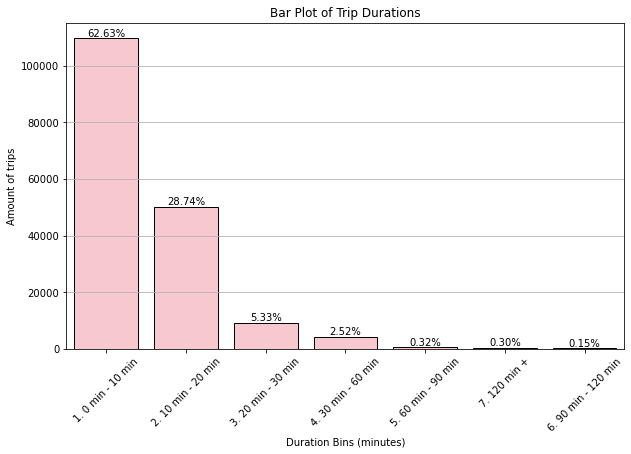

In [9]:
bike_trips['duration_min'] = round(bike_trips['duration_sec']/60,0)
bike_trips['duration_hour'] = round(bike_trips['duration_sec']/3600,1)

bike_trips['duration_min_range'] = pd.cut(bike_trips['duration_min']
                                         ,[0,10,20,30,60,90,120] + [24*60])

bike_trips['duration_min_range'] = bike_trips['duration_min_range'].astype(str)\
                                                                   .replace({'(0, 10]' : '1. 0 min - 10 min'
                                                                            ,'(10, 20]' : '2. 10 min - 20 min'
                                                                            ,'(20, 30]' : '3. 20 min - 30 min'
                                                                            ,'(30, 60]' : '4. 30 min - 60 min'
                                                                            ,'(60, 90]' : '5. 60 min - 90 min'
                                                                            ,'(90, 120]' : '6. 90 min - 120 min'
                                                                            ,'(120, 1440]' : '7. 120 min +'})

value_counts = bike_trips['duration_min_range'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.sort_index().plot(kind = 'bar'
                              ,color = 'pink'
                              ,edgecolor = 'black')
ax = sb.barplot(x=value_counts.index
               ,y=value_counts.values
               ,color='pink'
               ,edgecolor='black')

total_trips = value_counts.sum()

for index, value in enumerate(value_counts.values):
    percentage = (value / total_trips) * 100
    ax.text(index, value, f'{percentage:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Bar Plot of Trip Durations')
plt.xlabel('Duration Bins (minutes)')
plt.ylabel('Amount of trips')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Let's make a box plot with duration times (in minutes) without outliers (we consider only trips' information with less than 30 minutes).

Average of trip durations in bikes: 11.73


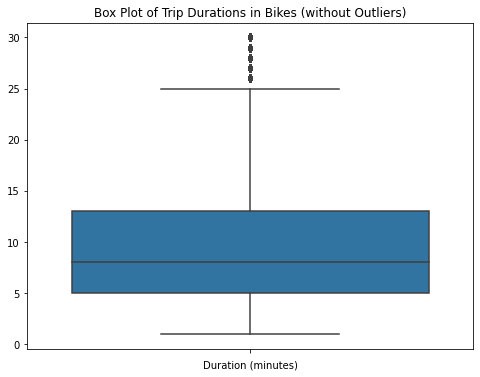

In [10]:
val = round(bike_trips.duration_min.mean(),2)
print(f'Average of trip durations in bikes: {val}')

plt.figure(figsize=(8, 6))
sb.boxplot(data = bike_trips[bike_trips['duration_min'] <= 30]
           ,y = 'duration_min')
plt.title('Box Plot of Trip Durations in Bikes (without Outliers)')
plt.xlabel('Duration (minutes)')
plt.ylabel('')
plt.show()

Now we can calculate the most frequent day of the week where users make trips.

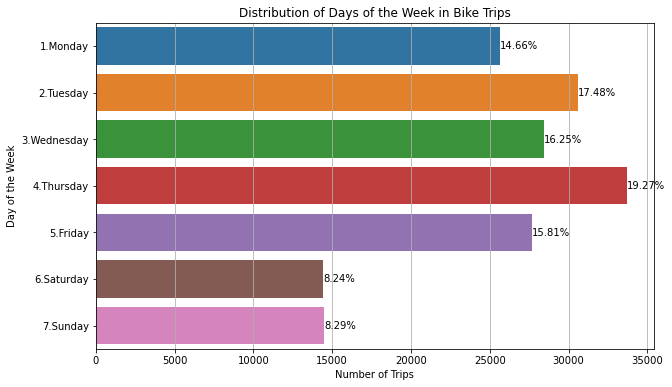

In [11]:
day_counts = bike_trips['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax =  sb.barplot(x = day_counts.values
                ,y = day_counts.index)

total = sum(day_counts.values)
for index, value in enumerate(day_counts.values):
    percentage = (value / total) * 100
    ax.text(value, index, f'{percentage:.2f}%', va='center', color='black', fontsize=10)

    
plt.title('Distribution of Days of the Week in Bike Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Day of the Week')
plt.grid(axis='x')

plt.show()

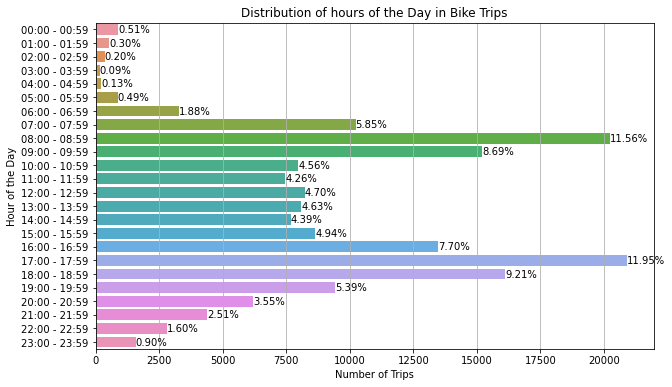

In [12]:
hour_counts = bike_trips['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax =  sb.barplot(x = hour_counts.values
                ,y = hour_counts.index)

total = sum(hour_counts.values)
for index, value in enumerate(hour_counts.values):
    percentage = (value / total) * 100
    ax.text(value, index, f'{percentage:.2f}%', va='center', color='black', fontsize=10)

    
plt.title('Distribution of hours of the Day in Bike Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Hour of the Day')
plt.grid(axis='x')

plt.show()

We are going to try to see if there is an favorite station to start or to end every trip.

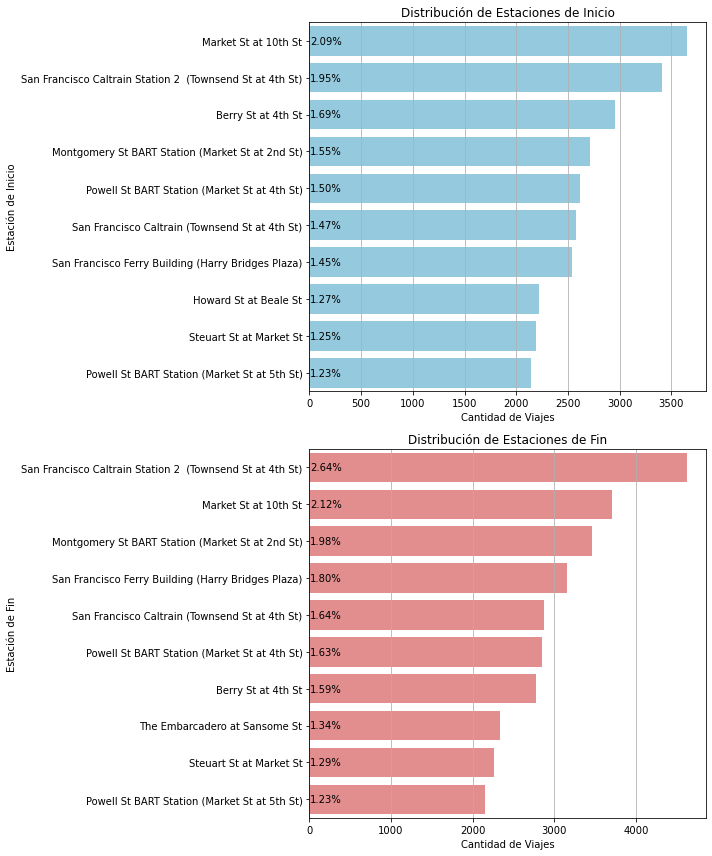

In [13]:
start_station_counts = bike_trips['start_station_name'].value_counts()
end_station_counts = bike_trips['end_station_name'].value_counts()

# Calculate initial percentages
total_start_trips = start_station_counts.sum()
start_percentages = [(count / total_start_trips) * 100 for count in start_station_counts.values]

total_end_trips = end_station_counts.sum()
end_percentages = [(count / total_end_trips) * 100 for count in end_station_counts.values]

# Re calculate to graph only the first 10 stations
start_station_counts = bike_trips['start_station_name'].value_counts().head(10)
end_station_counts = bike_trips['end_station_name'].value_counts().head(10)
start_percentages = start_percentages[:10]
end_percentages = end_percentages[:10]

# Create subplots with two horizontal bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Distribution of start_station_name
sb.barplot(x = start_station_counts.values
          ,y = start_station_counts.index
          ,color = 'skyblue'
          ,ax = ax1)

for index, value in enumerate(start_percentages):
    ax1.text(value + 2, index, f'{value:.2f}%', va='center', color='black', fontsize=10)
ax1.set_title('Distribución de Estaciones de Inicio')
ax1.set_xlabel('Cantidad de Viajes')
ax1.set_ylabel('Estación de Inicio')
ax1.grid(axis='x')

# Plot 2: Distribution of end_station_name
sb.barplot(x = end_station_counts.values
          ,y = end_station_counts.index
          ,color = 'lightcoral'
          ,ax = ax2)

for index, value in enumerate(end_percentages):
    ax2.text(value + 2, index, f'{value:.2f}%', va='center', color='black', fontsize=10)
ax2.set_title('Distribución de Estaciones de Fin')
ax2.set_xlabel('Cantidad de Viajes')
ax2.set_ylabel('Estación de Fin')
ax2.grid(axis='x')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

We see some popular stations because they appear at the most popular stations to start and end the trip; however, none of the stations have more than a 3% share of the trips.

Now, let's see the proportion of member users, where we obtain that 74,6% of the users are male.

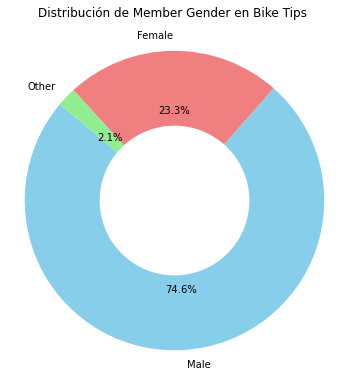

In [14]:
gender_counts = bike_trips['member_gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts
       ,labels = gender_counts.index
       ,autopct = '%1.1f%%'
       ,startangle = 140
       ,colors = ['skyblue'
                 ,'lightcoral'
                 ,'lightgreen']
       ,wedgeprops=dict(width=0.5))

plt.title('Distribución de Member Gender en Bike Tips \n')
plt.axis('equal')  # Para que la torta sea circular

plt.show()

Now, let's look at the proportion of user types where we can see that Subscriber has the most engagement.

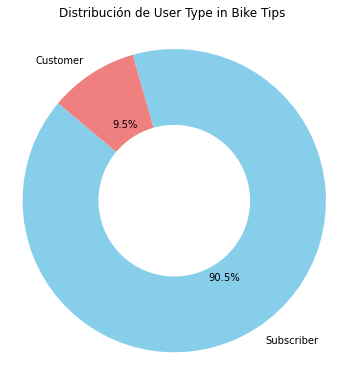

In [15]:
user_type_counts = bike_trips['user_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(user_type_counts
       ,labels = user_type_counts.index
       ,autopct = '%1.1f%%'
       ,startangle = 140
       ,colors = ['skyblue'
                 ,'lightcoral'
                 ,'lightgreen']
       ,wedgeprops=dict(width=0.5))

plt.title('Distribución de User Type in Bike Tips \n')
plt.axis('equal')  # Para que la torta sea circular

plt.show()

Now, let's explore the distribution of users by age. We'll start by calculating the age using both the birth year and the year of the records (2019).

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64
Average of age users: 34.0


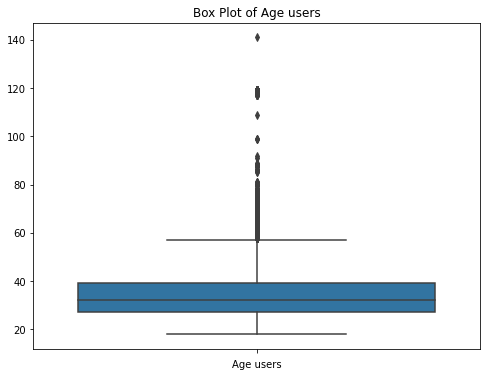

In [16]:
bike_trips['age'] = (2019 - bike_trips['member_birth_year']).astype(int)
val = round(bike_trips['age'].mean(),0)

print(bike_trips['age'].describe())

print(f'Average of age users: {val}')

plt.figure(figsize = (8, 6))
sb.boxplot(data = bike_trips
           ,y = 'age')
plt.title('Box Plot of Age users')
plt.xlabel('Age users')
plt.ylabel('')
plt.show()

Notably, there is significant participation among the young population, ranging from 27 to 39 years of age, with an average age of 32 for users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In accordance with the analysis conducted earlier, I emphasize some of the most relevant findings.

- The most frequent days for bike trips are from Monday to Friday, with a decline on weekends, and Thursday stands out as the day with the highest activity.
- Regarding the duration of these trips, 62% of the data indicates that a trip lasts less than 10 minutes. Additionally, 28.74% of trips have a duration between 10 and 20 minutes, meaning that in general, 90% of trips are completed in less than 20 minutes.
- In terms of the most common hours, it is found that the periods with the highest trip participation are from 8 to 9 in the morning and from 5 to 6 in the afternoon.
- 90% of users are customers, and among them, 74.6% are male. Notably, there is significant participation among the young population, ranging from 27 to 39 years of age, with an average age of 34 for users.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Regarding the features I investigated, one that I focused on extensively was related to the start_time and end_time variables (the date and time of trip start and end). From there, I derived crucial variables such as the precise time of day and the specific day of the week. Additionally, I deemed it beneficial to convert the trip duration variable from seconds to minutes for a more insightful graphical analysis. Finally, another variable where I performed significant manipulation was the birth year, in order to estimate the approximate age of all users and conduct an age-related analysis.

## Bivariate Exploration

Let's start by creating a box plot to observe differences between user types and trip duration (in minutes).

Mean of duration per type of user (in minutes):
user_type
Customer      21.844259
Subscriber    10.675685
Name: duration_min, dtype: float64


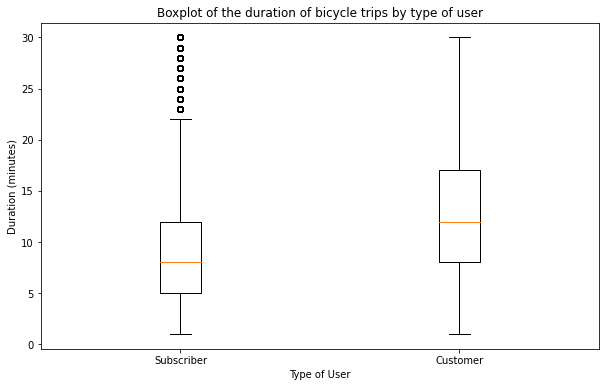

In [17]:
print('Mean of duration per type of user (in minutes):')
print(bike_trips.groupby('user_type')['duration_min'].mean())
filtered_bike_trips = bike_trips[bike_trips['duration_min'] <= 30]
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_bike_trips[filtered_bike_trips['user_type'] == 'Subscriber']['duration_min']
            ,filtered_bike_trips[filtered_bike_trips['user_type'] == 'Customer']['duration_min']]
           ,labels=['Subscriber', 'Customer'])
plt.title('Boxplot of the duration of bicycle trips by type of user')
plt.xlabel('Type of User')
plt.ylabel('Duration (minutes)')

plt.show()

Now, let's make the same previous exercise to observe differences between gender and trip duration (in minutes).

Average duration by user gender (in minutes) for users who spend less than 30 minutes on the trip:
member_gender
Female    10.352060
Male       9.291263
Other     10.053326
Name: duration_min, dtype: float64


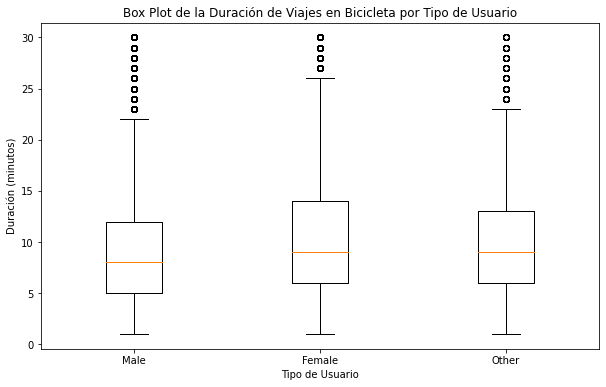

In [18]:
filtered_bike_trips = bike_trips[bike_trips['duration_min'] <= 30]

print('Average duration by user gender (in minutes) for users who spend less than 30 minutes on the trip:')
print(filtered_bike_trips.groupby('member_gender')['duration_min'].mean())

plt.figure(figsize=(10, 6))
plt.boxplot([filtered_bike_trips[filtered_bike_trips['member_gender'] == 'Male']['duration_min']
            ,filtered_bike_trips[filtered_bike_trips['member_gender'] == 'Female']['duration_min']
            ,filtered_bike_trips[filtered_bike_trips['member_gender'] == 'Other']['duration_min']],
            labels=['Male', 'Female','Other'])
plt.title('Box Plot de la Duración de Viajes en Bicicleta por Tipo de Usuario')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Duración (minutos)')

plt.show()

A violin Diagram can help to understand better the distribution of the duration in terms of gender.

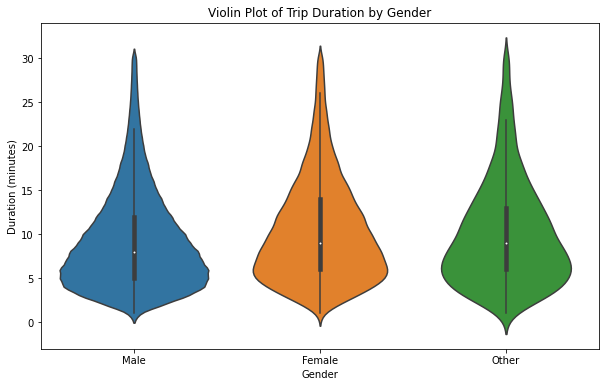

In [19]:
plt.figure(figsize=(10, 6))
sb.violinplot(data=filtered_bike_trips, x='member_gender', y='duration_min')
plt.title('Violin Plot of Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')

plt.show()

To do a better understanding in times of start travel, let's make a diagram to see the days and the hours with most frecency in travels.

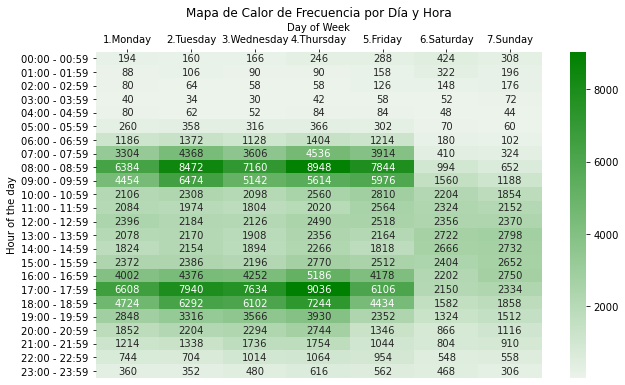

In [20]:
calendar = pd.pivot_table(bike_trips[['hour_of_day','day_of_week']]
                         ,index = ['hour_of_day']
                         ,columns = ['day_of_week']
                         ,aggfunc = np.size)

plt.figure(figsize=(10, 6))

custom_palette = sb.light_palette("green", as_cmap=True)
ax = sb.heatmap(calendar
               ,cmap = custom_palette
               ,annot=True
               ,fmt = 'd')

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


plt.title('Mapa de Calor de Frecuencia por Día y Hora')
plt.xlabel('Day of Week')
plt.ylabel('Hour of the day')

plt.show()

But let's see if theres a relation between age and time

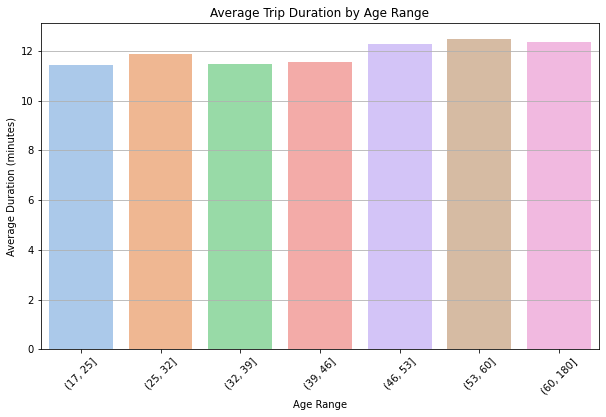

In [21]:
bike_trips['range_age'] = pd.cut(bike_trips['age']
                                ,[17,25,32,39,46,53,60,180])

bike_trips['range_age'].astype(str).replace({'(17, 25]':'18-25'
                                            ,'(25, 32]':'26-32'
                                            ,'(32, 39]':'33-39'
                                            ,'(39, 46]':'40-46'
                                            ,'(46, 53]':'47-53'
                                            ,'(53, 60]':'54-60'
                                            ,'(60, 180]':'60+'})

grouped_data = bike_trips.groupby(['range_age'])['duration_min'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data = grouped_data
          ,x = 'range_age'
          ,y = 'duration_min'
          ,palette='pastel')
plt.title('Average Trip Duration by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Duration (minutes)')


plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Let's create a plot illustrating the latitude and longitude of the starting stations to gain insight into the spatial distribution of these stations across the city.

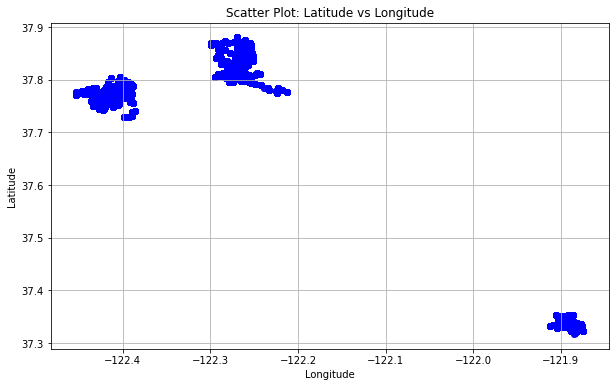

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(bike_trips['start_station_longitude']
           ,bike_trips['start_station_latitude']
           ,color='blue'
           ,alpha=0.5)
plt.title('Scatter Plot: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

For a deeper understanding, I present an imported image below that displays the map of the stations

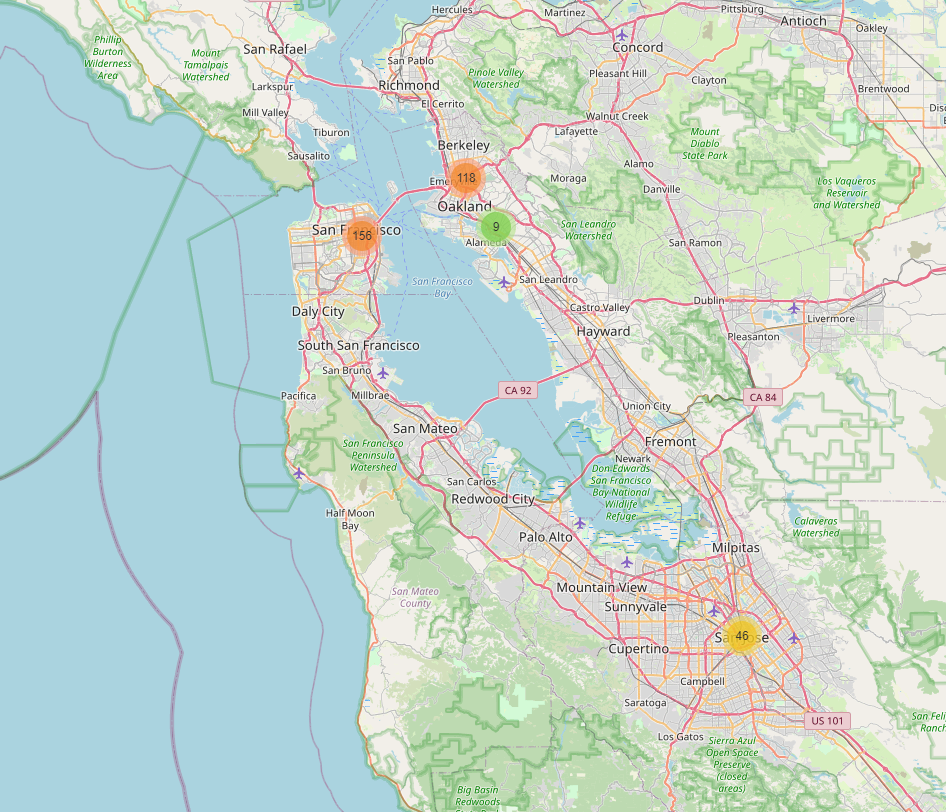

In [23]:
from IPython.display import display, Image
display(Image(filename='Map_plot.png'))

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Overall, a distinct difference in trip duration by gender is not evident. While men exhibit slightly faster times compared to women and other genders.

- Concerning the distinction between subscribers and customers, it is evident that subscribers undertake trips with an average duration 11 minutes less (10.6 minutes) than customers (21 minutes on average).

- Regarding the average trip duration across age groups, significant differences are not apparent. However, it is noticeable that the younger population (aged 18 to 46) completes trips with an average duration of less than 10 minutes, while the older population (above 47 years) takes more than 11 minutes on average for their bike trips

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- An intriguing relationship is observed between the days and hours of trips, with a substantial engagement in bicycle usage on weekdays, both during morning and afternoon hours.
- As for the latitude and longitude data, that is, it allowed me to see that there are three main areas in which the San Francisco stations are concentrated.

## Multivariate Exploration


Let's see if there a relation among user age, user member, and mean of the duration of bike

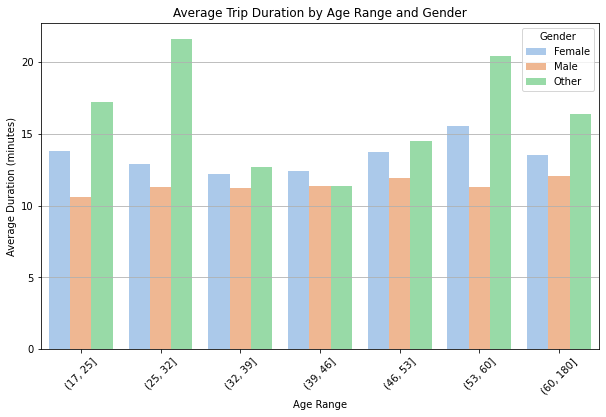

In [24]:
grouped_data = bike_trips.groupby(['range_age', 'member_gender'])['duration_min'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data = grouped_data
          ,x = 'range_age'
          ,y = 'duration_min'
          ,hue = 'member_gender'
          ,palette='pastel')
plt.title('Average Trip Duration by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Average Duration (minutes)')

# Add legend
plt.legend(title='Gender'
          ,loc='upper right')

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Let's see if there a relation among user age, user type, and mean of the duration of bike

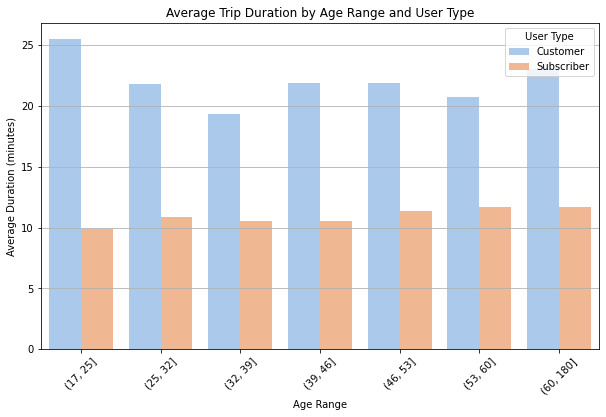

In [25]:
grouped_data = bike_trips.groupby(['range_age', 'user_type'])['duration_min'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data = grouped_data
          ,x = 'range_age'
          ,y = 'duration_min'
          ,hue = 'user_type'
          ,palette='pastel')
plt.title('Average Trip Duration by Age Range and User Type')
plt.xlabel('Age Range')
plt.ylabel('Average Duration (minutes)')

# Add legend
plt.legend(title='User Type'
          ,loc='upper right')

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Now, let's see if there a relation among type of user, user gender, and mean of the duration of bike

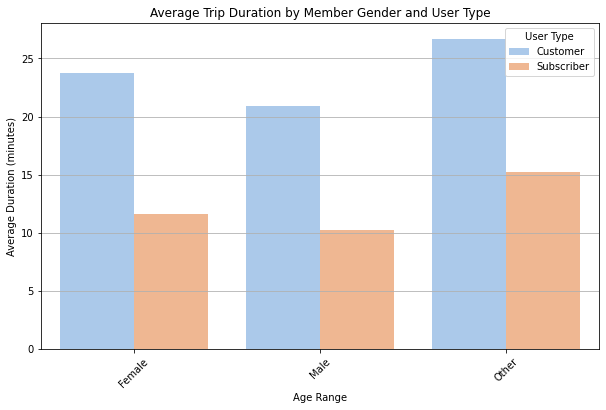

In [26]:
grouped_data = bike_trips.groupby(['member_gender', 'user_type'])['duration_min'].mean().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data = grouped_data
          ,x = 'member_gender'
          ,y = 'duration_min'
          ,hue = 'user_type'
          ,palette='pastel')
plt.title('Average Trip Duration by Member Gender and User Type')
plt.xlabel('Age Range')
plt.ylabel('Average Duration (minutes)')

# Add legend
plt.legend(title='User Type'
          ,loc='upper right')

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Now, let's see if there a relation among hour of the day, day of the week, and mean of the duration of bike

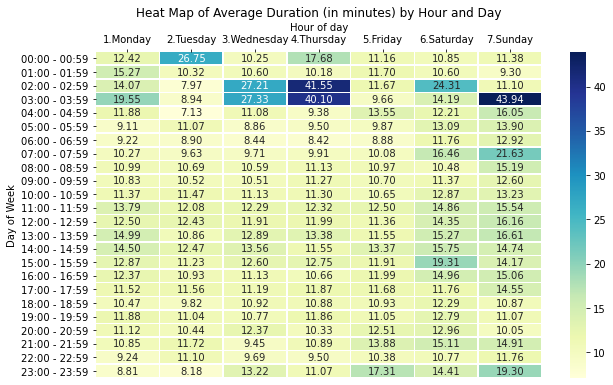

In [27]:
pivot_table = bike_trips.pivot_table(values='duration_min'
                                    ,index='hour_of_day'
                                    ,columns='day_of_week'
                                    ,aggfunc='mean')

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 6))
ax = sb.heatmap(pivot_table
               ,cmap='YlGnBu'
               ,annot=True
               ,fmt='.2f'
               ,linewidths=0.5)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.title('Heat Map of Average Duration (in minutes) by Hour and Day')
plt.xlabel('Hour of day')
plt.ylabel('Day of Week')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Overall, men demonstrate better performance in terms of bicycle usage times across all age ranges. However, it can be observed that the difference is not as pronounced for women, particularly in the age group of 33 to 46 years. A noteworthy point is that those identified with another gender exhibit a higher average bicycle usage time across all ages.

- Customers, in comparison to subscribers, spend twice as much time using the bicycle in all age groups. This trend remains consistent regardless of gender.
### Were there any interesting or surprising interactions between features?

- Interestingly, the morning and afternoon hours, where bicycle usage is more prevalent, record shorter usage times. Conversely, the off-peak hours, occurring between 2 and 4 in the morning, are precisely when the longest average usage times are observed."

## Conclusions
- One of the key findings underscores the pattern of bicycle usage during weekdays and the morning and afternoon hours. This behavior can be attributed to the fact that residents of San Francisco utilize bicycles for commuting to work or returning home.

- In a broader sense, it is evident that men require less time for bicycle usage and constitute a larger share in the bicycle user market.

- A user categorized as 'customer' spends twice as much time on bicycle usage compared to a user marked as a 'subscriber', regardless of their age or gender. This may imply that subscribed customers utilize bicycles more frequently than customers."